In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("telecom_churn.csv")

In [4]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


array([[<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'AccountWeeks'}>,
        <AxesSubplot:title={'center':'ContractRenewal'}>],
       [<AxesSubplot:title={'center':'DataPlan'}>,
        <AxesSubplot:title={'center':'DataUsage'}>,
        <AxesSubplot:title={'center':'CustServCalls'}>],
       [<AxesSubplot:title={'center':'DayMins'}>,
        <AxesSubplot:title={'center':'DayCalls'}>,
        <AxesSubplot:title={'center':'MonthlyCharge'}>],
       [<AxesSubplot:title={'center':'OverageFee'}>,
        <AxesSubplot:title={'center':'RoamMins'}>, <AxesSubplot:>]],
      dtype=object)

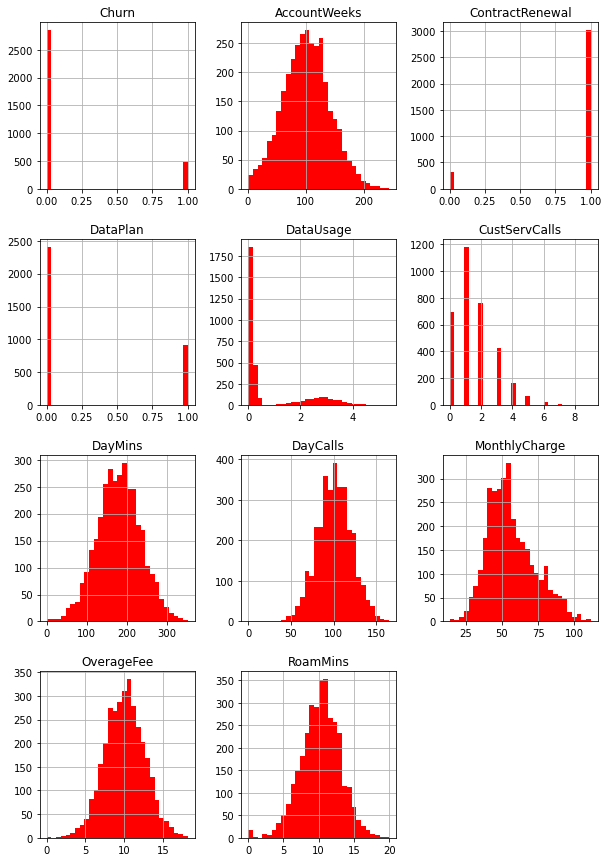

In [7]:
df.hist(figsize=(10,15), bins=30, color = 'r')

<AxesSubplot:title={'center':'Churn Ratio'}, ylabel='Churn'>

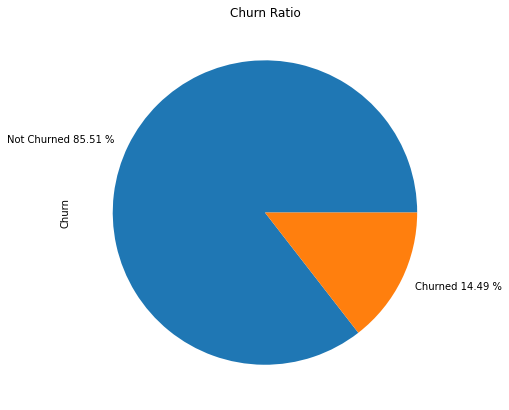

In [8]:
df['Churn'].value_counts().plot(kind = "pie",title="Churn Ratio", 
                                labels = ["Not Churned {:.2f} %".format(len(df.loc[df.Churn==0])*100/len(df.Churn)),
                                          "Churned {:.2f} %".format(len(df.loc[df.Churn==1])*100/len(df.Churn))],
                                figsize=(7,7))

In [9]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

<AxesSubplot:>

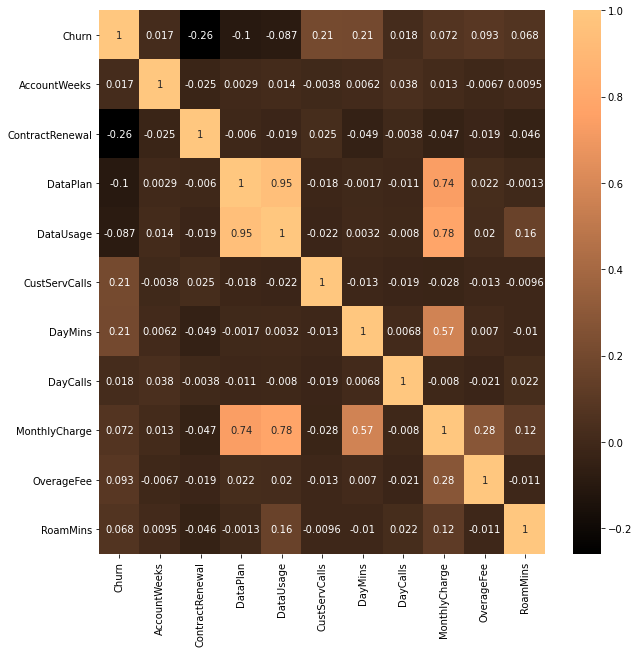

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='copper')

In [11]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [12]:
X = df.drop("Churn",axis = 1)
y = df["Churn"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 20)

In [14]:
ss = StandardScaler()

In [15]:
X_train = ss.fit_transform(X_train)

In [16]:
X_train

array([[ 1.71143959,  0.32942967, -0.61695364, ...,  0.31516996,
        -0.83492891,  1.26601369],
       [ 0.45489262,  0.32942967, -0.61695364, ..., -1.05871418,
         0.13762267,  1.62281822],
       [ 0.37949981,  0.32942967,  1.62086732, ...,  1.8661325 ,
        -1.21601034,  0.55240462],
       ...,
       [ 0.22871417,  0.32942967, -0.61695364, ..., -0.14279142,
        -0.60072261,  0.51672417],
       [ 0.40463075,  0.32942967, -0.61695364, ..., -1.05871418,
        -0.4022427 , -0.91049397],
       [ 0.12819041,  0.32942967, -0.61695364, ..., -0.99765266,
         0.55840008, -0.6607308 ]])

In [17]:
X_test = ss.fit_transform(X_test)

In [18]:
X_test

array([[-0.51938328,  0.32012394, -0.62416611, ...,  1.19388363,
         0.62308223,  1.06388998],
       [-0.39409263,  0.32012394, -0.62416611, ..., -0.23915948,
        -0.47200151, -0.02888957],
       [-0.3690345 ,  0.32012394, -0.62416611, ..., -0.01637547,
        -0.79204358,  0.59035217],
       ...,
       [-1.6971154 ,  0.32012394, -0.62416611, ..., -0.61247324,
         1.50608988, -0.06531556],
       [ 0.78363948,  0.32012394, -0.62416611, ..., -0.25120186,
        -0.84602658, -0.64813132],
       [-0.34397637,  0.32012394, -0.62416611, ..., -0.57032491,
        -1.01183152, -0.97596518]])

# DecisionTreeClassifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=10)

In [21]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=0)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
pred = dt.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       576
           1       0.86      0.60      0.71        91

    accuracy                           0.93       667
   macro avg       0.90      0.79      0.84       667
weighted avg       0.93      0.93      0.93       667



In [24]:
cm = confusion_matrix

In [25]:
cm(y_test,pred)

array([[567,   9],
       [ 36,  55]], dtype=int64)

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

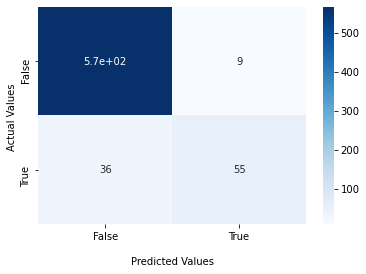

In [26]:
plot_cm = sns.heatmap(cm(y_test,pred), annot=True, cmap='Blues')

plot_cm.set_xlabel('\nPredicted Values')
plot_cm.set_ylabel('Actual Values ')

plot_cm.xaxis.set_ticklabels(['False','True'])
plot_cm.yaxis.set_ticklabels(['False','True'])

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

In [28]:
fpr, tpr, thresholds = roc_curve(y_test,pred)

In [29]:
auc = roc_auc_score(y_test,pred)
print('AUC: %.3f' % auc)

AUC: 0.794


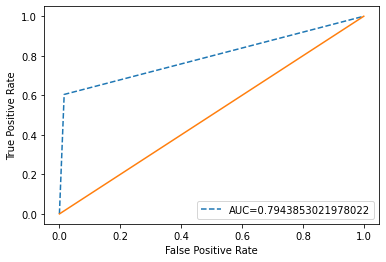

In [30]:
plt.plot(fpr,tpr, linestyle='--',label="AUC="+str(auc))
plt.plot([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier(n_estimators=100)

In [33]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
rf_pred = rf.predict(X_test)

In [35]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       576
           1       0.87      0.74      0.80        91

    accuracy                           0.95       667
   macro avg       0.91      0.86      0.88       667
weighted avg       0.95      0.95      0.95       667



In [36]:
cm(y_test,rf_pred)

array([[566,  10],
       [ 24,  67]], dtype=int64)

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

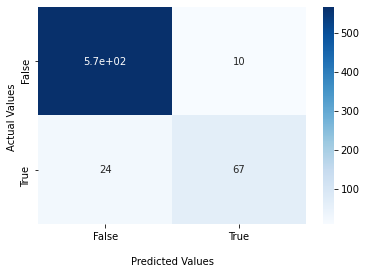

In [37]:
plot_cm = sns.heatmap(cm(y_test,rf_pred), annot=True, cmap='Blues')

plot_cm.set_xlabel('\nPredicted Values')
plot_cm.set_ylabel('Actual Values ')

plot_cm.xaxis.set_ticklabels(['False','True'])
plot_cm.yaxis.set_ticklabels(['False','True'])

In [38]:
fpr, tpr, thresholds = roc_curve(y_test,rf_pred)

In [39]:
auc = roc_auc_score(y_test,rf_pred)
print('AUC: %.3f' % auc)

AUC: 0.859


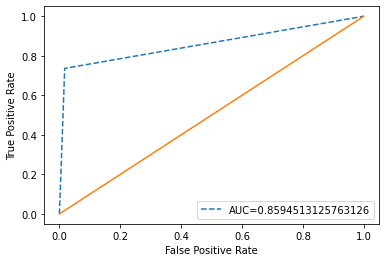

In [40]:
plt.plot(fpr,tpr, linestyle='--',label="AUC="+str(auc))
plt.plot([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# KNeighborsClassifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [43]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
knn_pred = knn.predict(X_test)

In [45]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       576
           1       0.72      0.48      0.58        91

    accuracy                           0.90       667
   macro avg       0.82      0.73      0.76       667
weighted avg       0.90      0.90      0.90       667



In [46]:
cm(y_test,knn_pred)

array([[559,  17],
       [ 47,  44]], dtype=int64)

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

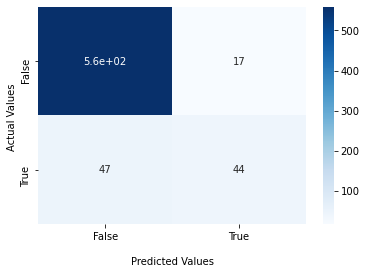

In [47]:
plot_cm = sns.heatmap(cm(y_test,knn_pred), annot=True, cmap='Blues')

plot_cm.set_xlabel('\nPredicted Values')
plot_cm.set_ylabel('Actual Values ')

plot_cm.xaxis.set_ticklabels(['False','True'])
plot_cm.yaxis.set_ticklabels(['False','True'])

In [48]:
fpr, tpr, thresholds = roc_curve(y_test,knn_pred)

In [49]:
auc = roc_auc_score(y_test,knn_pred)
print('AUC: %.3f' % auc)

AUC: 0.727


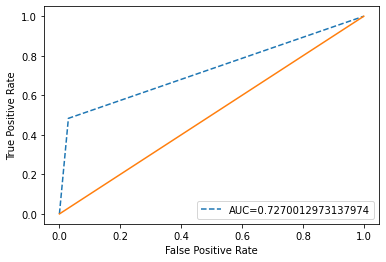

In [50]:
plt.plot(fpr,tpr, linestyle='--',label="AUC="+str(auc))
plt.plot([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()